In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import menelaus
from matplotlib import gridspec
from menelaus.datasets import make_example_batch_data

A continuación, se carga un dataset desde la librería Menelaus. Este dataset está creado para el estudio de data drifts sintéticos.

Contiene 10 features númericas, de valor continuo. Además, existe una columna que indica el año en el que se recogieron los datos, en un rango entre 2007 y 2021. Para poder observar mejor los cambios en la serie temporal, se añade una columna timestamp.

In [5]:
df = make_example_batch_data()

In [6]:
df

,year,a,b,c,d,e,f,g,h,i,j,cat,confidence,drift
0,2007,5036.441154,198.936685,6995.029198,133187.697950,0.402750,-1.339692,90453.457231,8819.761759,5398.861764,1059.835492,2,0.591243,False
1,2007,10773.027107,179.260652,3467.970499,52174.100900,1.019491,-1.145258,72629.507052,10137.233887,7009.344647,1552.888540,2,0.196090,False
2,2007,6173.596856,199.775829,4921.472906,101848.950792,-2.248839,1.903668,54839.516587,9603.709193,10579.518133,856.266082,1,0.504019,False
3,2007,13208.612929,182.222072,9638.632797,92442.165726,-0.045599,1.106212,84447.758390,12511.305427,5618.433039,451.926312,2,0.487307,False
4,2007,2719.272009,213.028454,5501.439179,79155.846985,-1.602719,-1.368130,168769.099013,16034.259622,6214.909756,853.582074,1,0.211284,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2021,8434.682418,203.931217,8674.083920,104317.953759,-1.588765,-1.313684,165132.657078,284.979440,7065.994173,83.803525,2,0.641595,True
299996,2021,9701.660570,179.925659,8021.128673,63749.091322,0.412063,0.408188,124630.300901,323.602163,10960.392248,96.796410,1,0.467875,True
299997,2021,6928.908424,210.007943,3312.751778,126116.364855,0.113971,2.432577,107318.127090,214.452933,9491.057615,169.644626,2,0.787726,True
299998,2021,6410.255420,205.092167,6914.861179,158221.742954,0.060710,0.928108,71610.603448,570.911317,8577.498702,61.404365,0,0.689538,True


Las features de este dataframe son "year", "a", "b", ..., "j", "cat":

- Se muestran datos entre 2007 y 2021, con 20000 observaciones cada año.

- Las features "b", "e", "f" siguen una distribución normal.

- Las features "a", "c", "d", "g", "h", "i", "j" siguen una distribución gamma.

- La feture "cat" contiene variables categóricas entre 1 y 7.

Data Drift ocurre en los siguientes casos:

- La media de la columna "b" cambia en 2009. Vuelve a la distribución inicial en 2010.

- La varianza de las columnas "c" y "d" cambia en 2012 sustituyendo algunos valores por la media. Vuelven a su distribución inicial en 2013.

- Crece la correlación entre las columnas "e" y "f" en 2015. 

- Cambian la media y la varianza de la columna "h" en 2019, manteniendo esta distribución hasta el final.  

- Cambian la media y la varianza de la columna "j" en 2021.

In [7]:
df = df.iloc[:, :-2]

In [9]:
# add "timestamp" column
df = df.assign(ordered = pd.date_range(start='1/1/2007',end = '12/31/2021', periods = len(df)))

In [10]:
df

,year,a,b,c,d,e,f,g,h,i,j,cat,ordered
0,2007,5036.441154,198.936685,6995.029198,133187.697950,0.402750,-1.339692,90453.457231,8819.761759,5398.861764,1059.835492,2,2007-01-01 00:00:00.000000000
1,2007,10773.027107,179.260652,3467.970499,52174.100900,1.019491,-1.145258,72629.507052,10137.233887,7009.344647,1552.888540,2,2007-01-01 00:26:17.669258897
2,2007,6173.596856,199.775829,4921.472906,101848.950792,-2.248839,1.903668,54839.516587,9603.709193,10579.518133,856.266082,1,2007-01-01 00:52:35.338517795
3,2007,13208.612929,182.222072,9638.632797,92442.165726,-0.045599,1.106212,84447.758390,12511.305427,5618.433039,451.926312,2,2007-01-01 01:18:53.007776692
4,2007,2719.272009,213.028454,5501.439179,79155.846985,-1.602719,-1.368130,168769.099013,16034.259622,6214.909756,853.582074,1,2007-01-01 01:45:10.677035590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2021,8434.682418,203.931217,8674.083920,104317.953759,-1.588765,-1.313684,165132.657078,284.979440,7065.994173,83.803525,2,2021-12-30 22:14:49.322964352
299996,2021,9701.660570,179.925659,8021.128673,63749.091322,0.412063,0.408188,124630.300901,323.602163,10960.392248,96.796410,1,2021-12-30 22:41:06.992223296
299997,2021,6928.908424,210.007943,3312.751778,126116.364855,0.113971,2.432577,107318.127090,214.452933,9491.057615,169.644626,2,2021-12-30 23:07:24.661482176
299998,2021,6410.255420,205.092167,6914.861179,158221.742954,0.060710,0.928108,71610.603448,570.911317,8577.498702,61.404365,0,2021-12-30 23:33:42.330741056


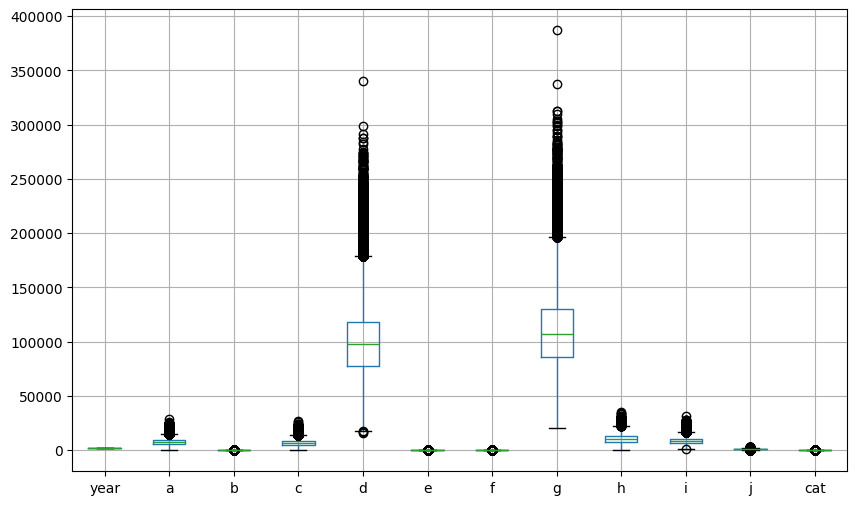

In [76]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot()
plt.show()

### Feature a

Esta variable no sufre drift

In [12]:
df.a.describe()

count    300000.000000
mean       7996.260257
std        2821.556182
min         677.266993
25%        5953.075837
50%        7668.021122
75%        9682.993372
max       28943.566493
Name: a, dtype: float64

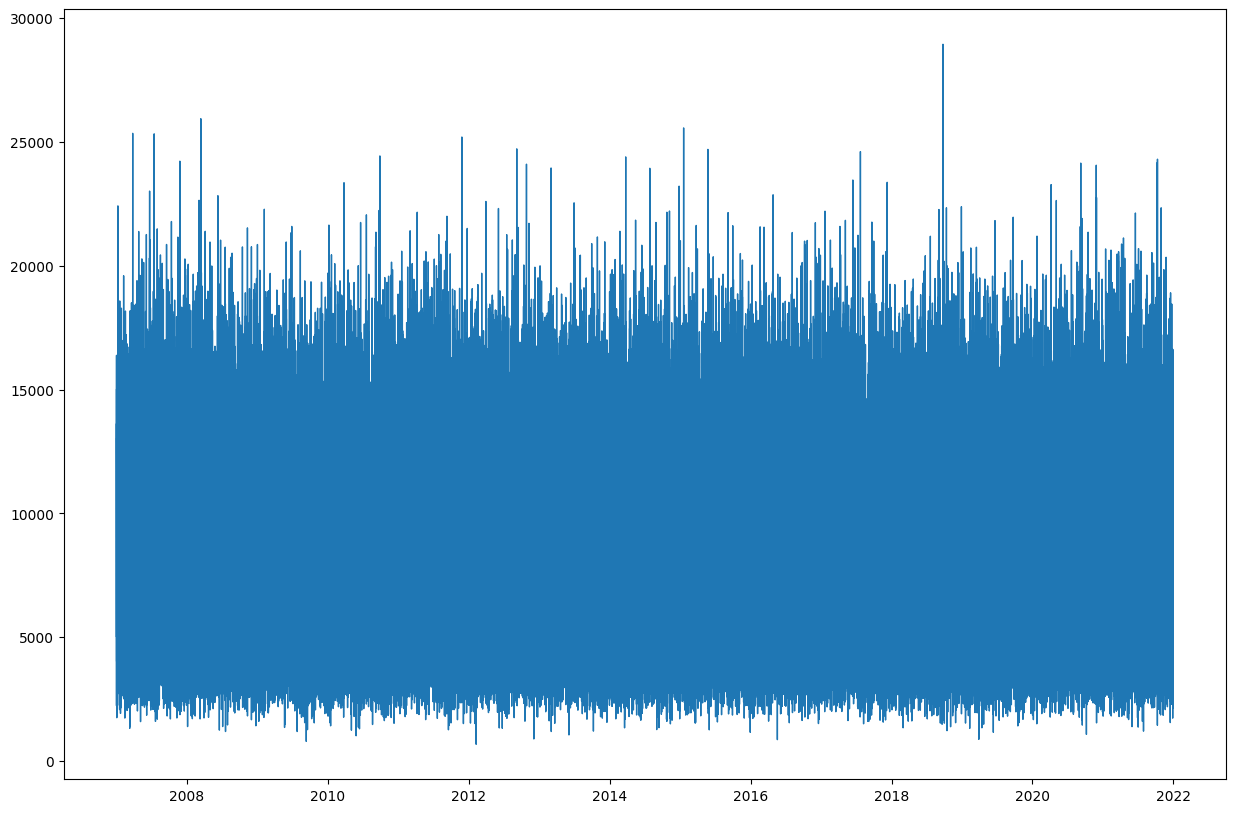

In [33]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.a

ax.plot(x, y, linewidth=1.0)


plt.show()

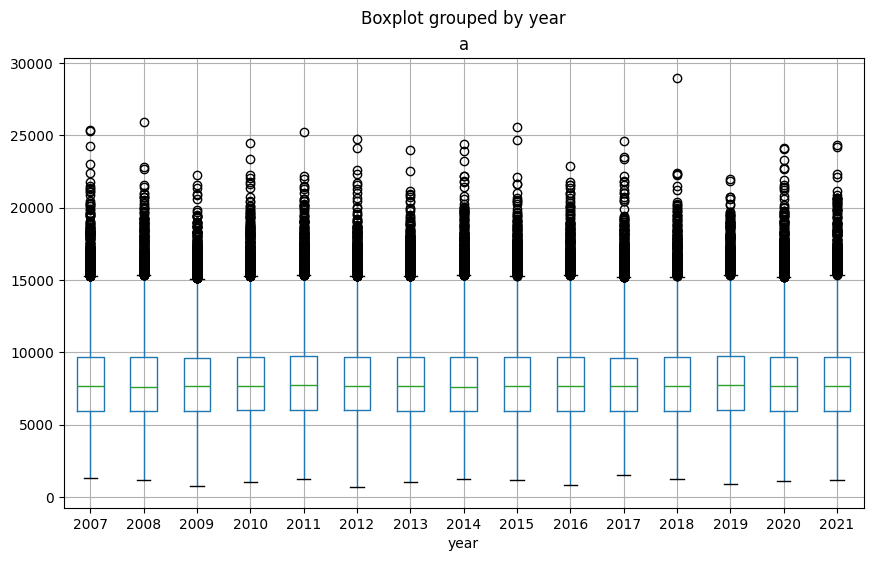

In [43]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='a', by='year', ax=ax)
plt.show()

### Feature b

La media de la variable 'b' cambia en 2009 y retorna a su valor inicial en 2010

In [44]:
df.b.describe()

count    300000.000000
mean        219.989591
std          75.469245
min         154.843412
25%         193.778379
50%         200.899503
75%         208.576112
max         542.256080
Name: b, dtype: float64

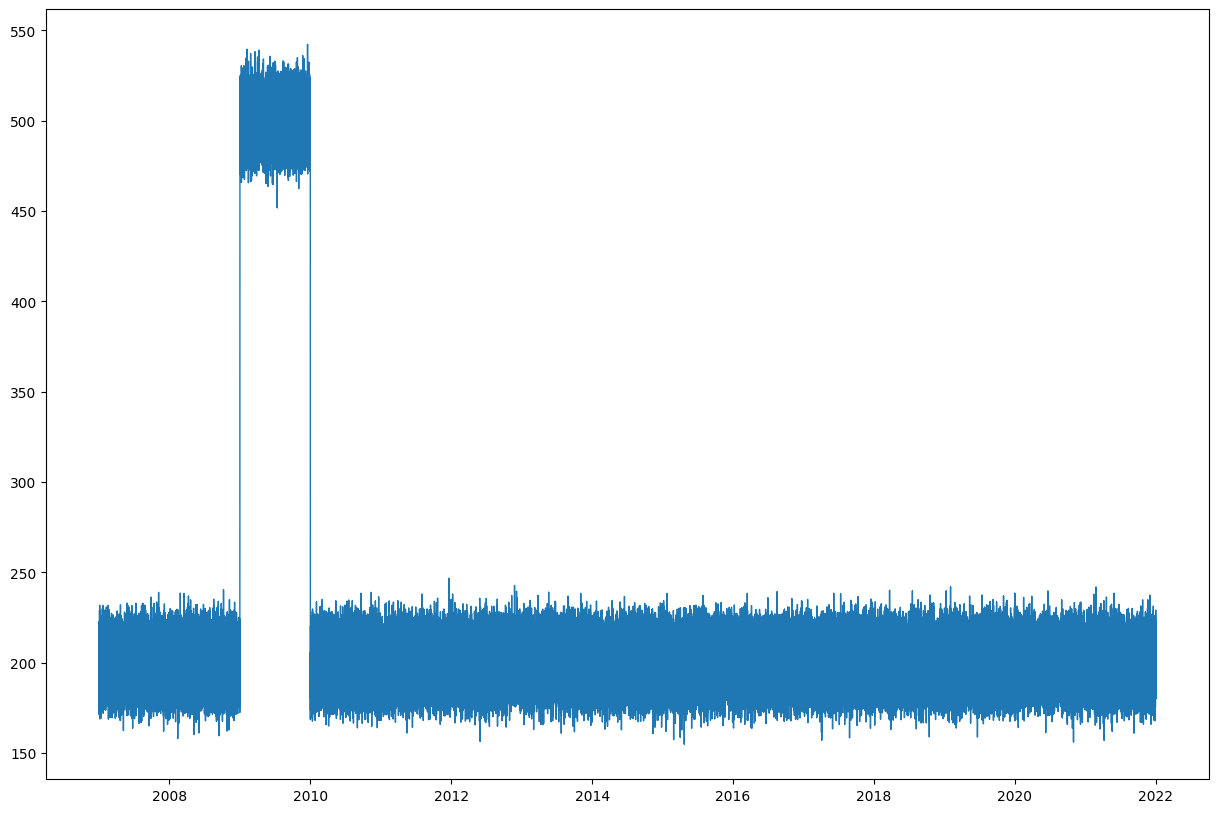

In [45]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.b

ax.plot(x, y, linewidth=1.0)


plt.show()

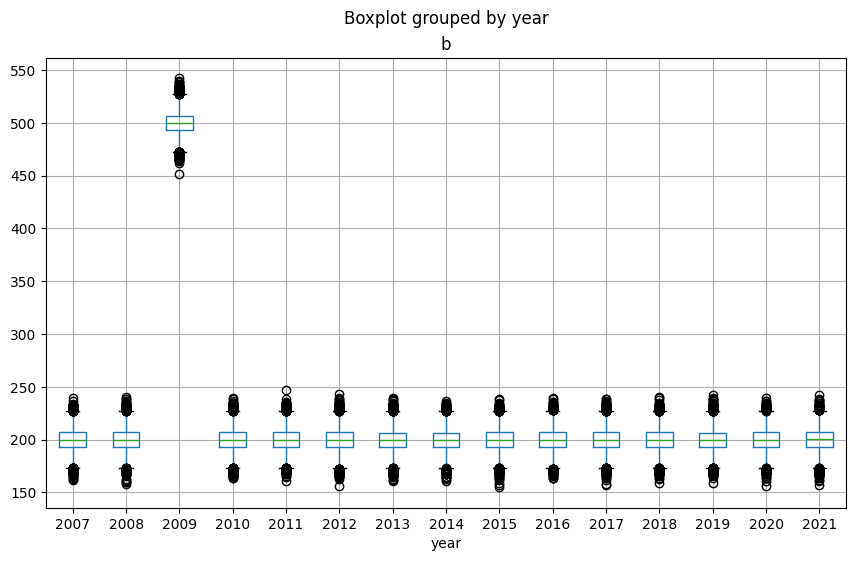

In [47]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='b', by='year', ax=ax)
plt.show()

### Feature c

La varianza de la variable 'c' cambia en 2012 y retorna a su valor inicial en 2013

In [46]:
df.c.describe()

count    300000.000000
mean       7001.347835
std        2636.651166
min         674.243793
25%        5097.856987
50%        6692.918027
75%        8540.806428
max       27365.542603
Name: c, dtype: float64

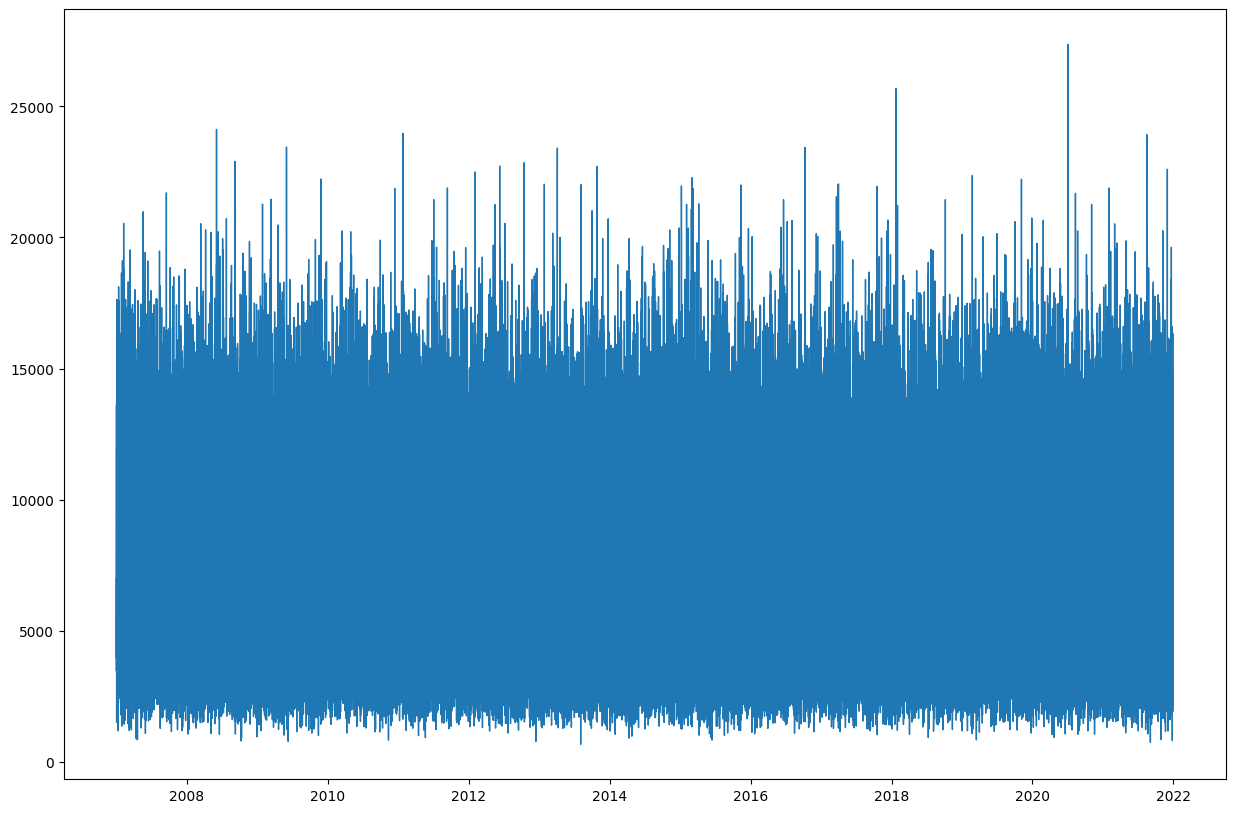

In [49]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.c

ax.plot(x, y, linewidth=1.0)


plt.show()

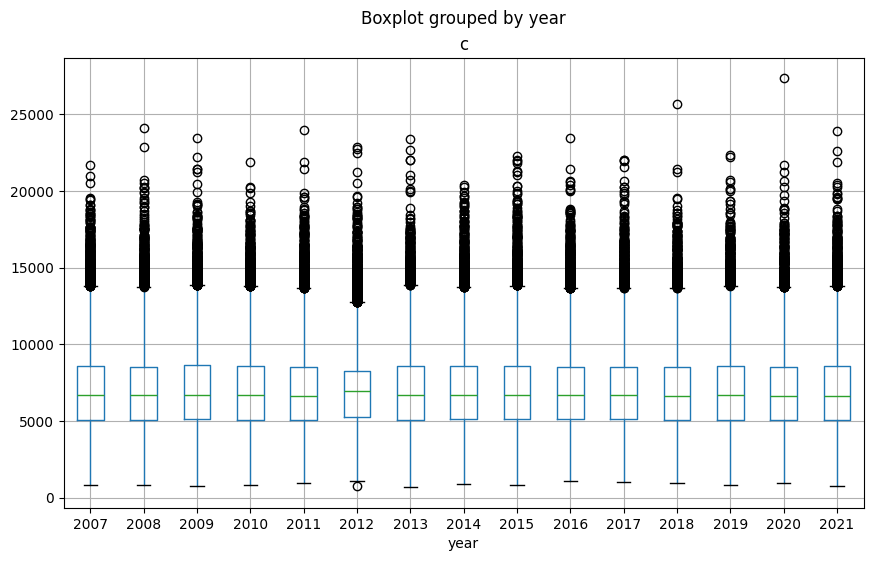

In [48]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='c', by='year', ax=ax)
plt.show()

### Feature d

La varianza de la variable 'd' cambia en 2012 y retorna a su valor inicial en 2013

In [50]:
df.d.describe()

count    300000.000000
mean     100080.847945
std       31165.056625
min       16277.368397
25%       77982.790425
50%       98109.788958
75%      118282.399072
max      340630.649079
Name: d, dtype: float64

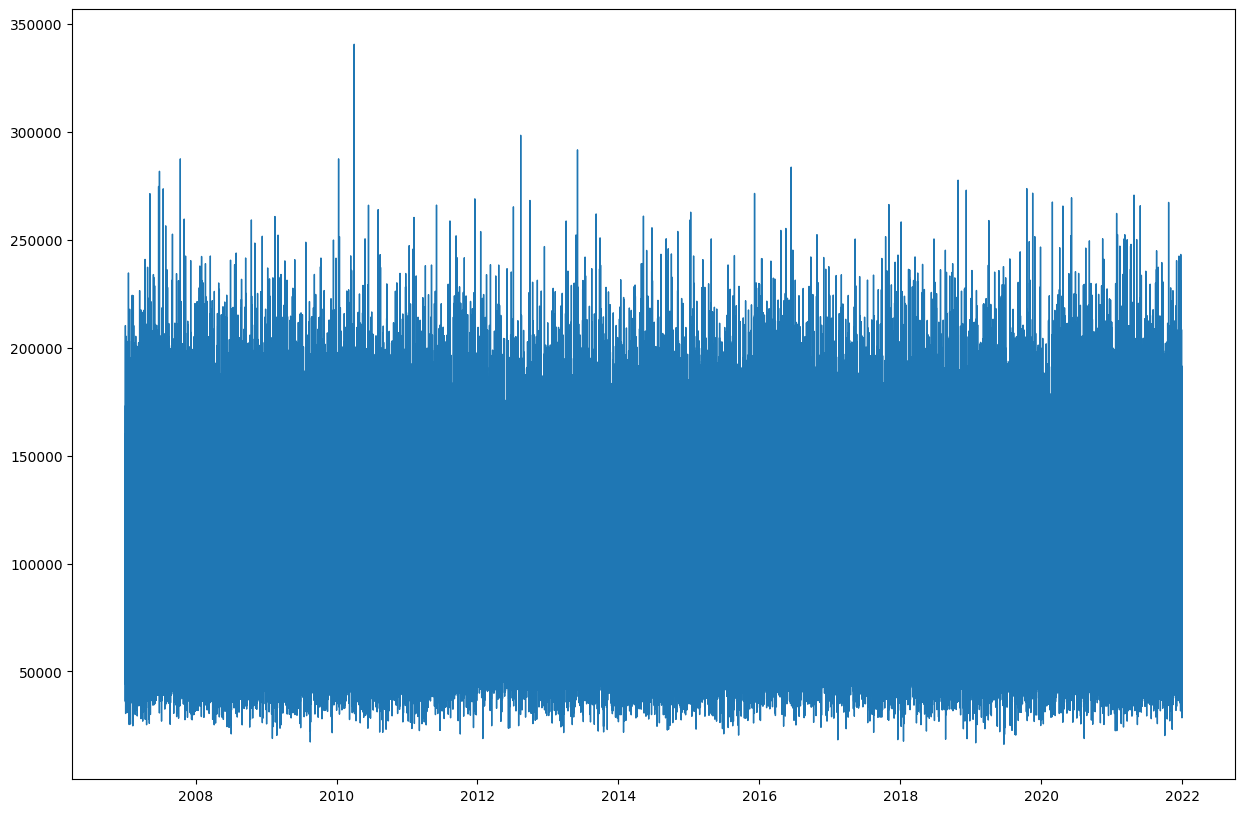

In [57]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.d

ax.plot(x, y, linewidth=1.0)


plt.show()

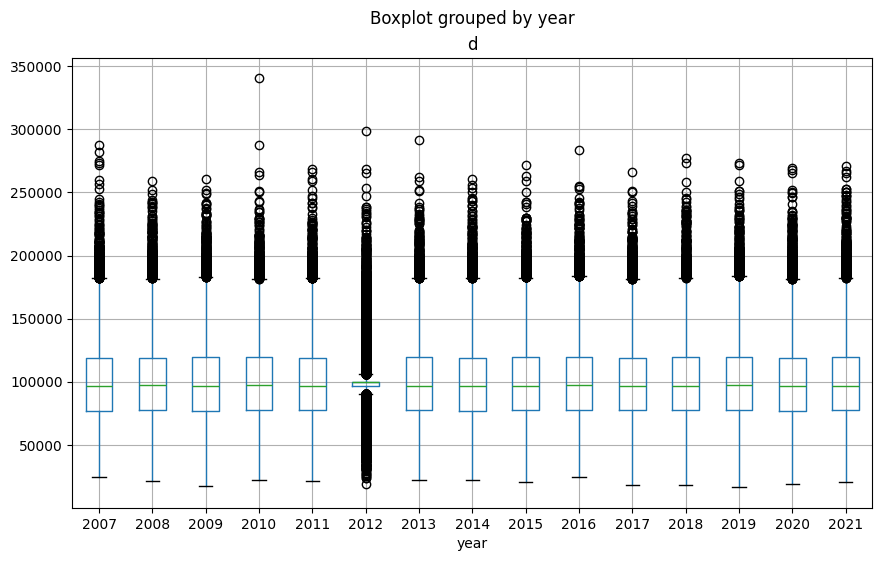

In [64]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='d', by='year', ax=ax)
plt.show()

### Feature e

Aumenta la correlación de esta variable con la variable 'f' en 2015

In [51]:
df.e.describe()

count    300000.000000
mean          0.002215
std           1.416542
min          -6.992112
25%          -0.950061
50%           0.003798
75%           0.953961
max           6.277572
Name: e, dtype: float64

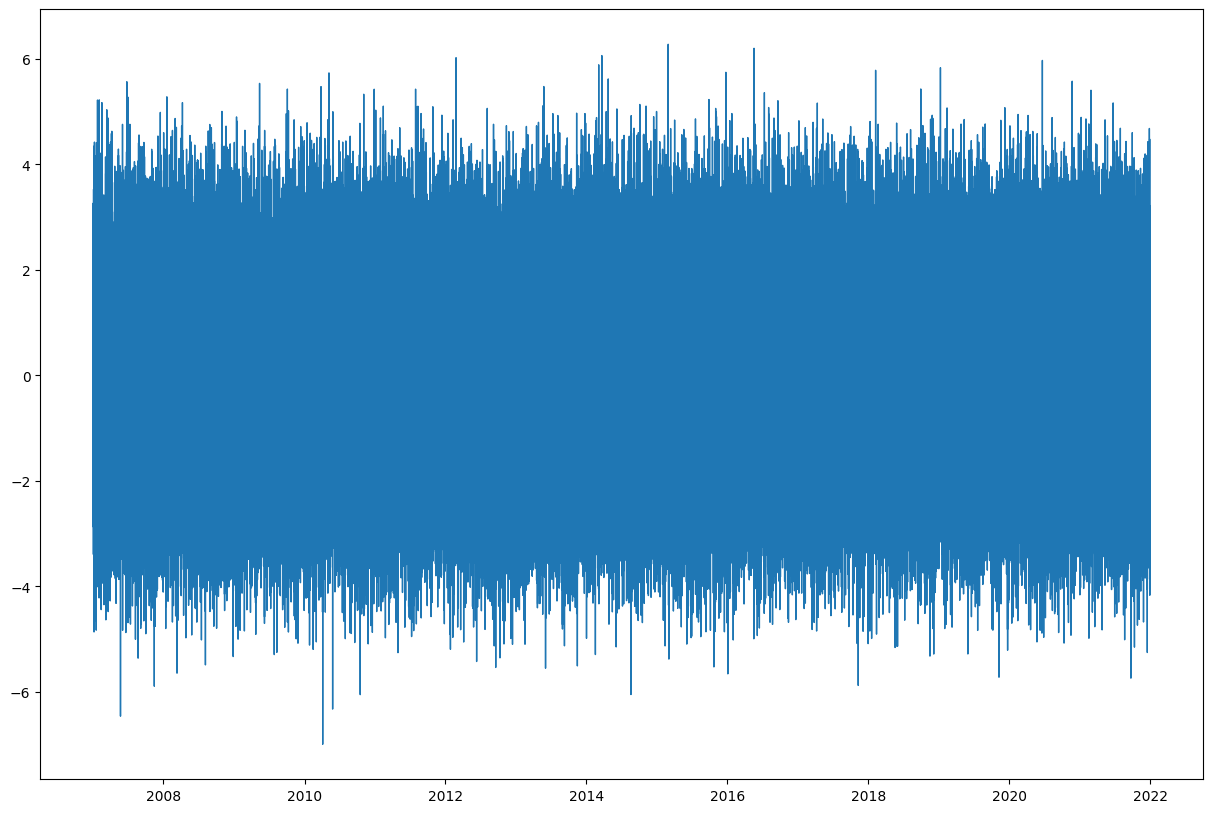

In [58]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.e

ax.plot(x, y, linewidth=1.0)


plt.show()

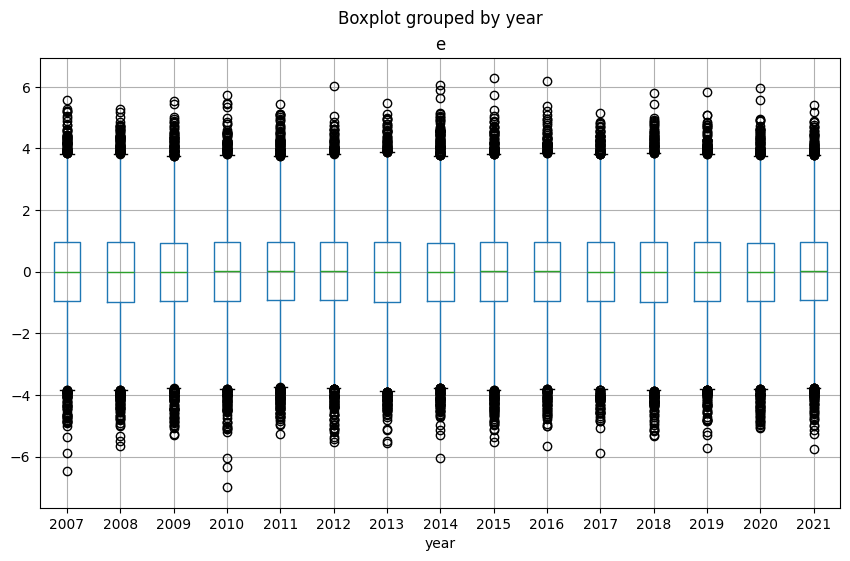

In [65]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='e', by='year', ax=ax)
plt.show()

### Feature f

Aumenta la correlación de esta variable con la variable 'e' en 2015

In [52]:
df.f.describe()

count    300000.000000
mean         -0.003784
std           1.415155
min          -6.525454
25%          -0.958724
50%          -0.007382
75%           0.950502
max           6.825382
Name: f, dtype: float64

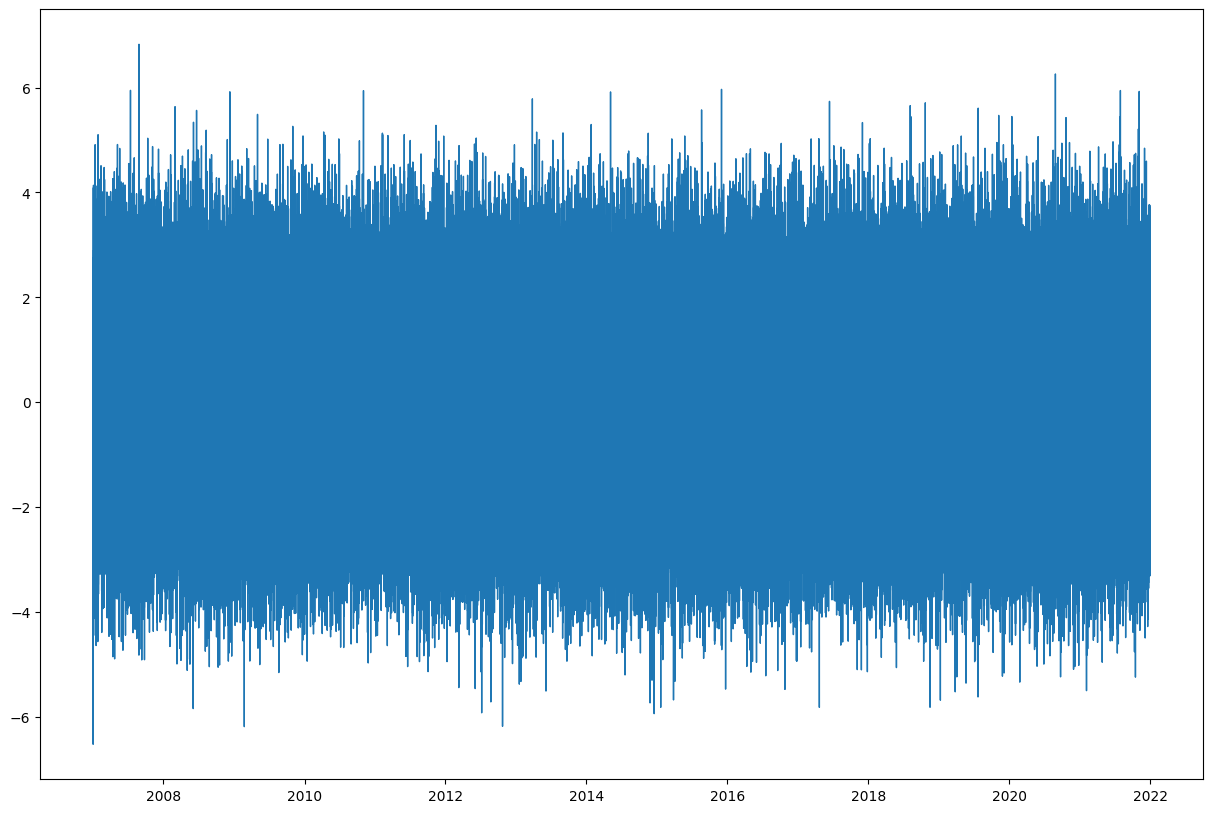

In [59]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.f

ax.plot(x, y, linewidth=1.0)


plt.show()

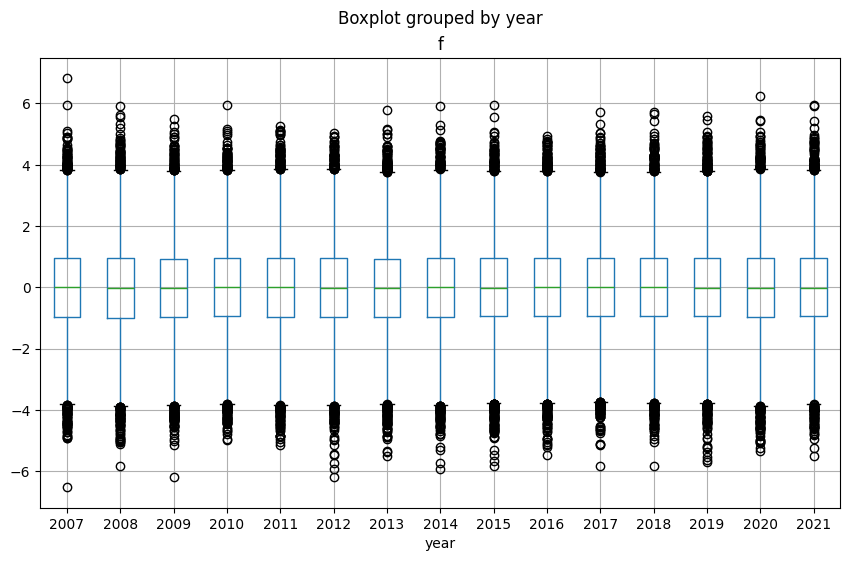

In [66]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='f', by='year', ax=ax)
plt.show()

### Feature g

Esta variable no sufre drift

In [53]:
df.g.describe()

count    300000.000000
mean     110106.791127
std       33220.741790
min       20775.740296
25%       86227.188479
50%      106791.947392
75%      130351.868662
max      386925.373508
Name: g, dtype: float64

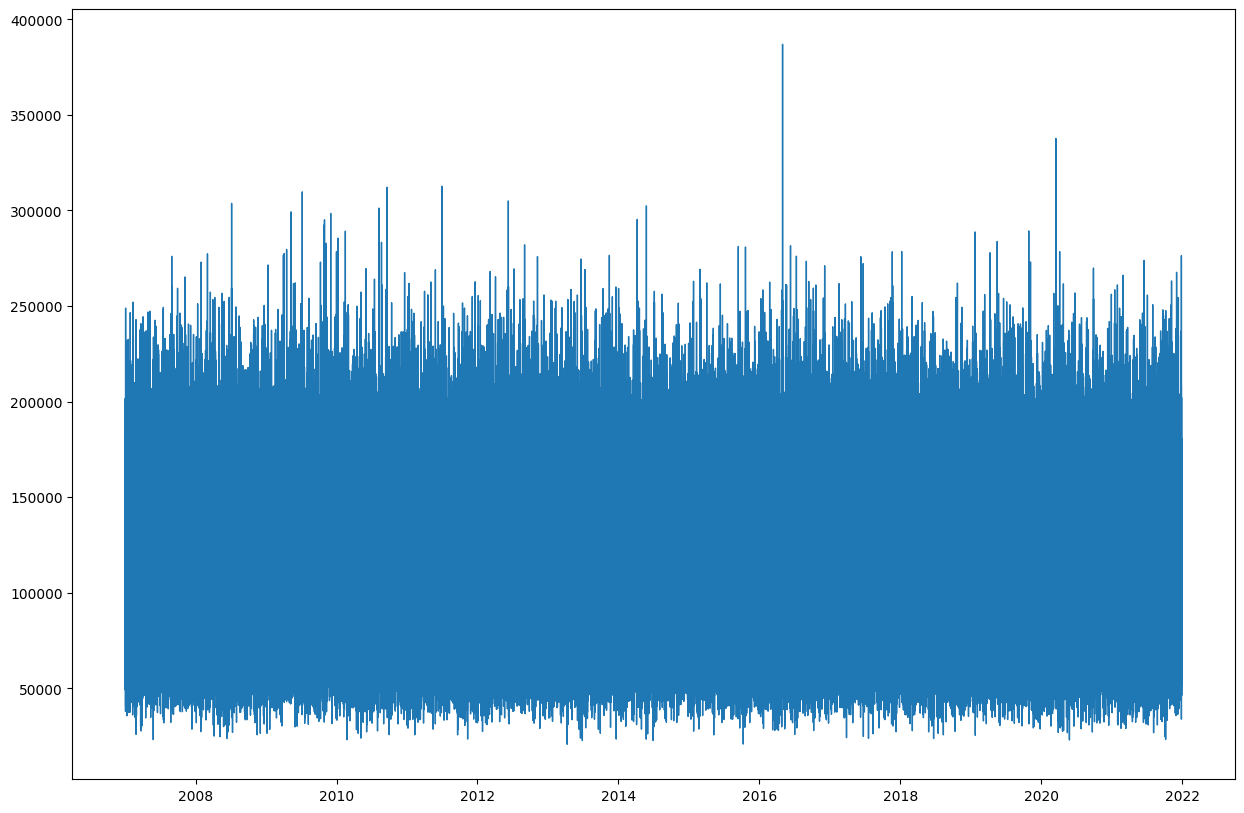

In [60]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.g

ax.plot(x, y, linewidth=1.0)


plt.show()

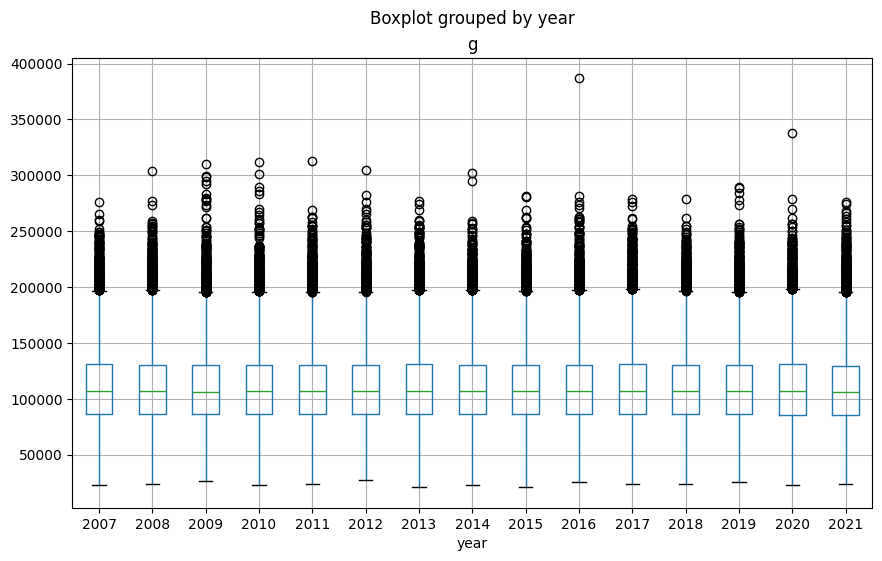

In [67]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='g', by='year', ax=ax)
plt.show()

### Feature h

La media y la varianza de esta variable cambian a partir de 2019, y no retornan a los valores iniciales

In [54]:
df.h.describe()

count    300000.000000
mean       9806.092944
std        5405.237465
min           0.049635
25%        7200.087772
50%       10624.945596
75%       13430.530018
max       35025.445888
Name: h, dtype: float64

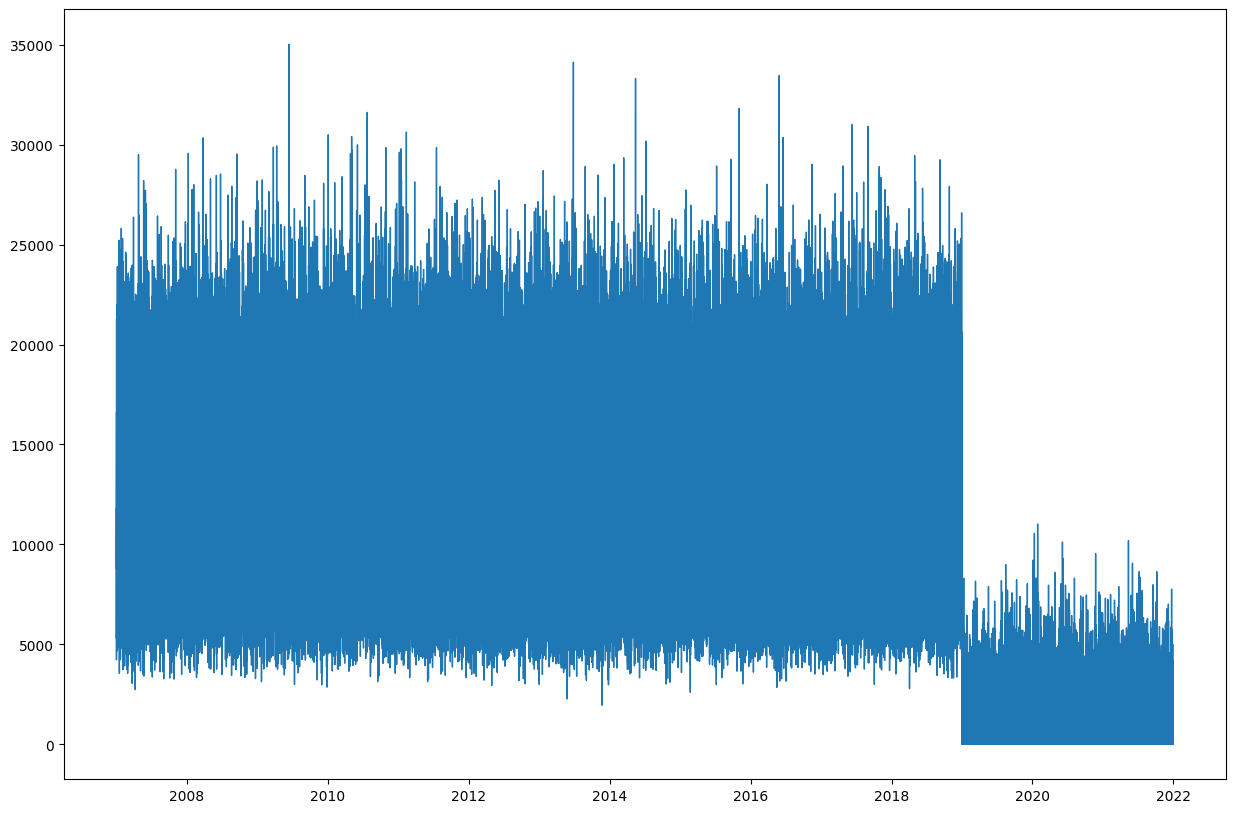

In [61]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.h

ax.plot(x, y, linewidth=1.0)


plt.show()

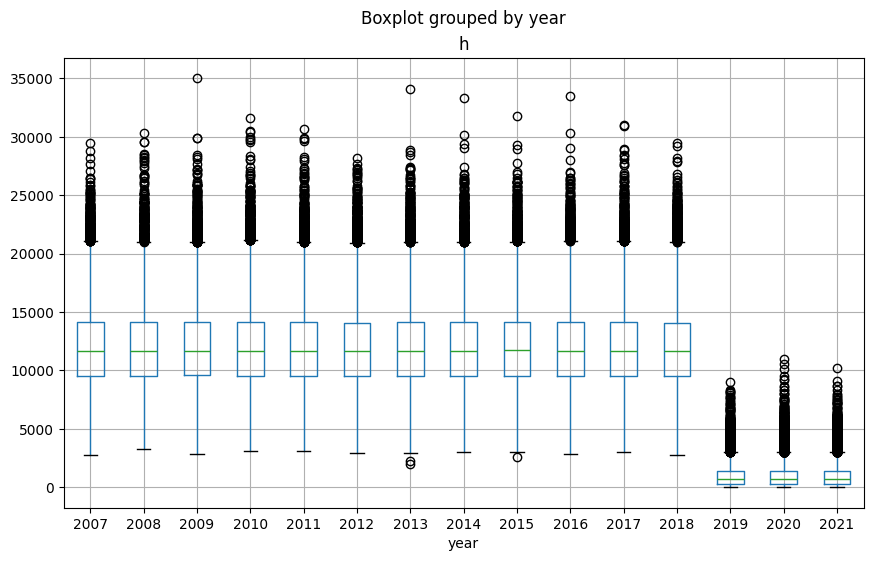

In [68]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='h', by='year', ax=ax)
plt.show()

### Feature i

Esta variable no sufre drift

In [55]:
df.i.describe()

count    300000.000000
mean       9006.044508
std        3007.855162
min         758.181397
25%        6841.562987
50%        8671.160651
75%       10808.054850
max       31514.743953
Name: i, dtype: float64

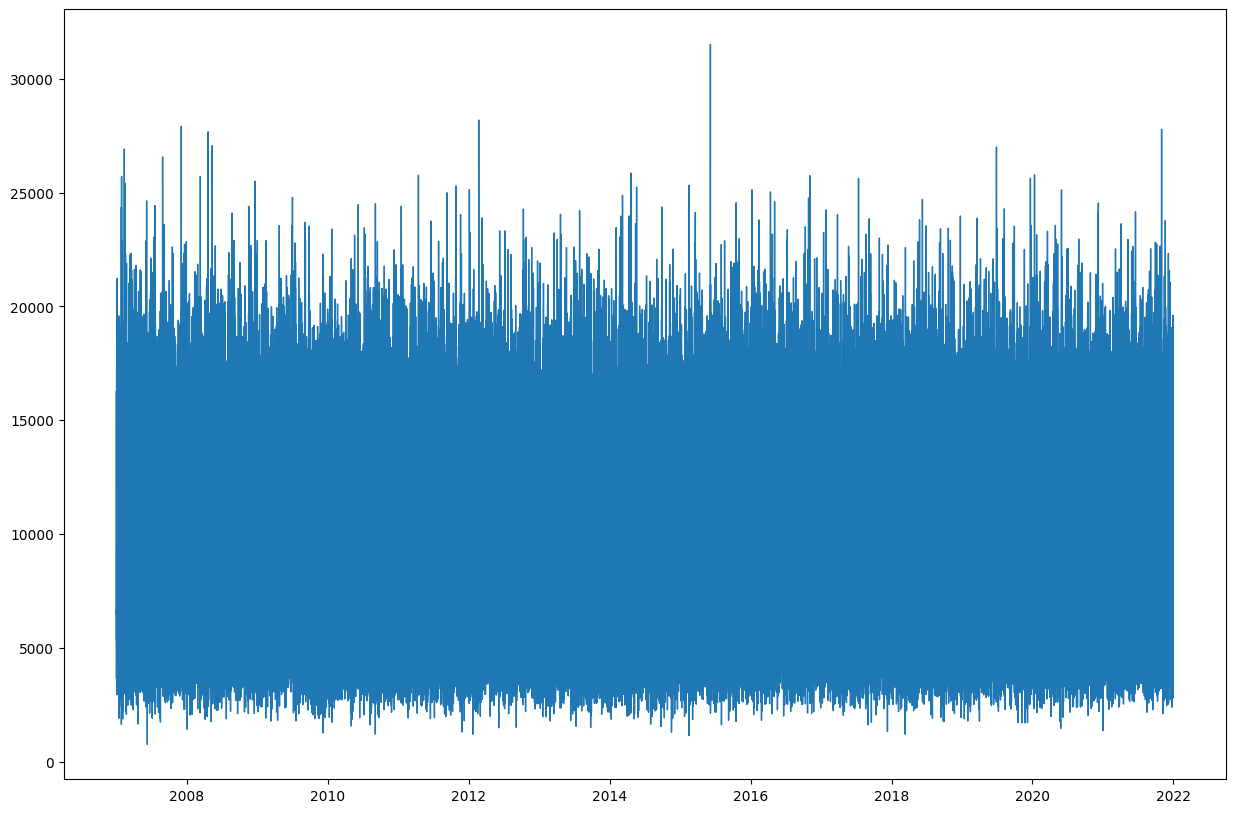

In [62]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.i

ax.plot(x, y, linewidth=1.0)


plt.show()

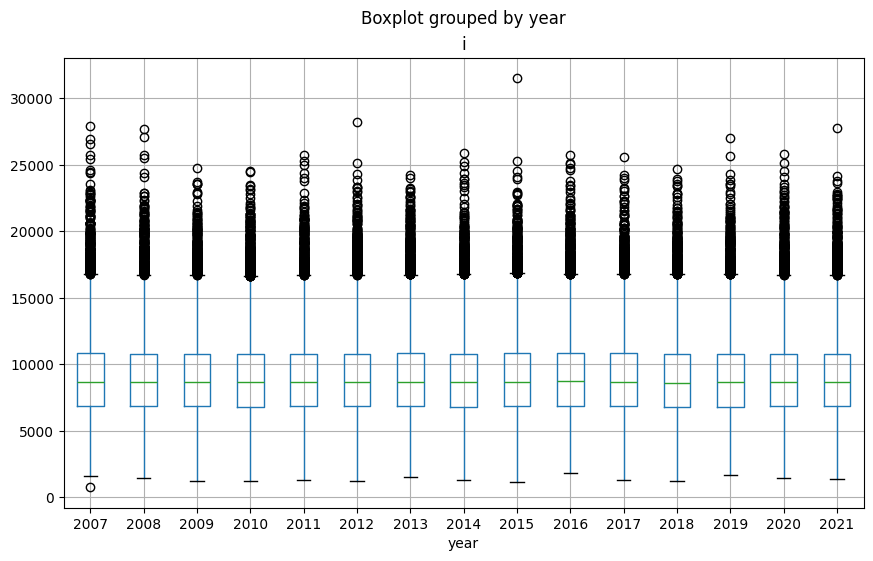

In [69]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='i', by='year', ax=ax)
plt.show()

### Feature j

La media y la varianza de esta variable cambian a partir de 2021

In [56]:
df.j.describe()

count    300000.000000
mean        940.406022
std         379.622235
min          18.210572
25%         726.354103
50%         939.508124
75%        1171.797317
max        3165.713176
Name: j, dtype: float64

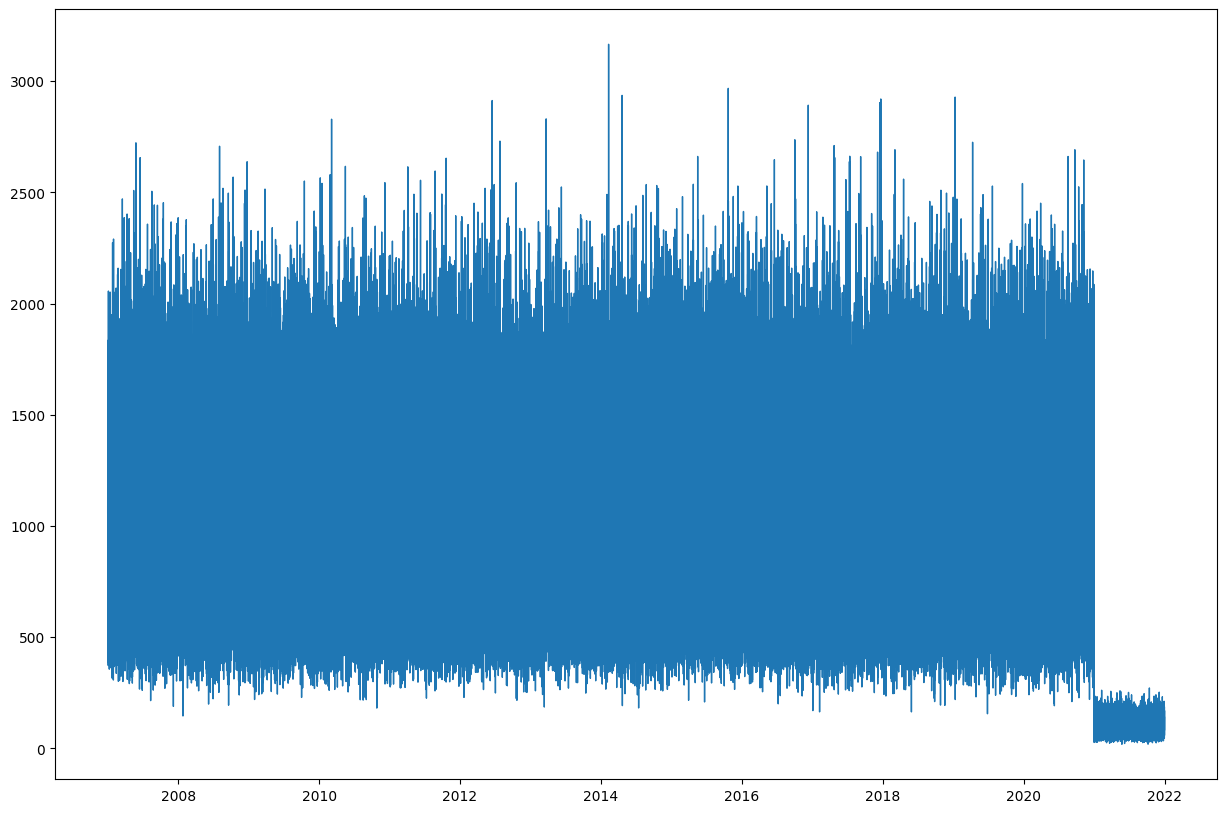

In [63]:
# plot

fig, ax = plt.subplots(figsize = (15,10))

x = df.ordered
y = df.j

ax.plot(x, y, linewidth=1.0)


plt.show()

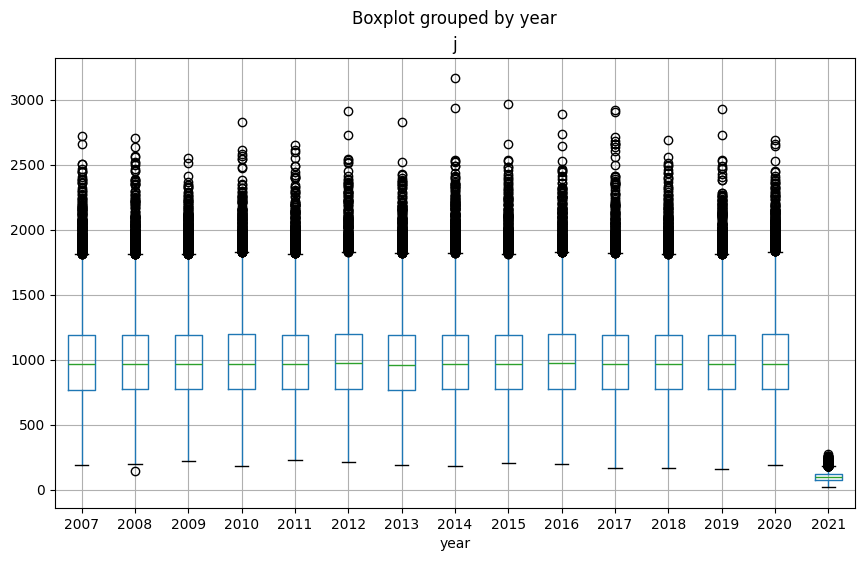

In [70]:
fig, ax = plt.subplots(figsize=(10, 6)) 
df.boxplot(column='j', by='year', ax=ax)
plt.show()